In [33]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [34]:
#Loading the dataset
data=pd.read_csv('50_Startups.csv')

In [35]:
data
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
df=data.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend',},axis=1)
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
Data=df.drop(['State'],axis=1)
Data.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# EDA

In [38]:
#here we are exploring our data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [39]:
# cheching if there is any missing values in the dataset
Data.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [40]:
Data.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correkation Matrix

In [41]:
Data.corr()
#here we can observe that the correlation between RD_Spend and Profit is very high(i.e, 0.97)

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


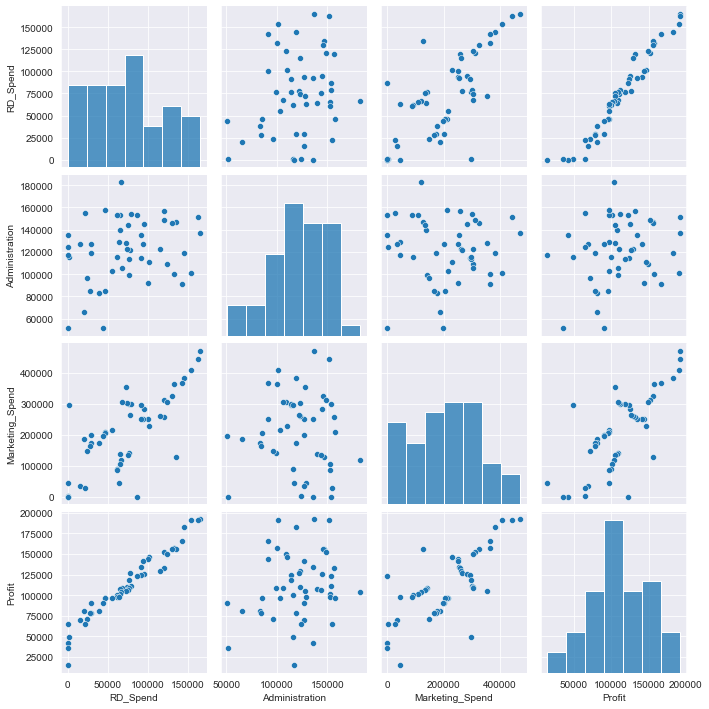

In [42]:
sns.set_style(style='darkgrid')
sns.pairplot(Data)
plt.show()

# Preaparing a Model

In [43]:
import statsmodels.formula.api as smf
model= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=Data).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        10:06:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#Coefficients
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [46]:
#t-Value and p-Value
print(model.tvalues, '\n', model.pvalues)
#here Adminstration valur is >0.05 so it is insignifficant from us

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [47]:
#R Squared Values
#here we are including all the four features 
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [51]:
#Checking the R-square value individualy whether the R-square value of Administration is signifficant or not
#Also find their t-Values and p-Values
model_Adim=smf.ols('Profit~Administration', data=Data).fit()
print(model_Adim.tvalues, '\n', model_Adim.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [52]:
#Checking the R-square value individualy whether the R-square value of Marketing_Spend is signifficant or not
#Also find their t-Values and p-Values
model_Mts=smf.ols('Profit~Marketing_Spend', data=Data).fit()
print(model_Mts.tvalues, '\n', model_Mts.pvalues)
#here the Marketin_Spend is signifficant because the p-Value<0.05

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [56]:
#here we are combining the both Adminstration and Marketing_Spend togther and to build the model
model_AM=smf.ols('Profit~Administration+Marketing_Spend', data=Data).fit()
print(model_AM.tvalues, '\n', model_AM.pvalues)
#here while we combining the both values p-Values together it will increasing >0.05
#so the both are insignifficant,so these is happening because of multicolinearity
#to fix that problem of multicolinearity by using VIF method

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


# Calculating Variance Inflation Factor (VIF)

In [60]:
rsq_rds=smf.ols('RD_Spend~Administration+Marketing_Spend',data=Data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols('Administration~RD_Spend+Marketing_Spend',data=Data).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mts=smf.ols('Marketing_Spend~RD_Spend+Administration', data=Data).fit().rsquared
vif_mts=1/(1-rsq_mts)

#sorting thw vif values in a data frame
d1={'Variables':['rds','adm','mts'],'VIF':[vif_rds,vif_adm,vif_mts]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,rds,2.468903
1,adm,1.175091
2,mts,2.326773


In [61]:
#Clearly we can observe that we should eliminate Marketing_Spend

# Model Validation Techiniques(MVT)

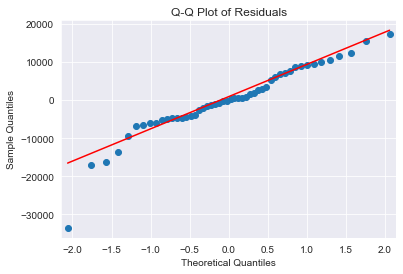

In [64]:
#QQ plot

import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [67]:
# Residual Plot
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

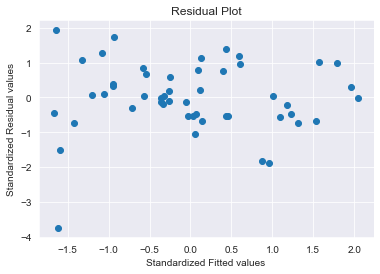

In [69]:
#here we are applying the above functon on the fitted values
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title("Residual Plot")
plt.xlabel("Standardized Fitted values")
plt.ylabel("Standardized Residual values")
plt.show()

eval_env: 1


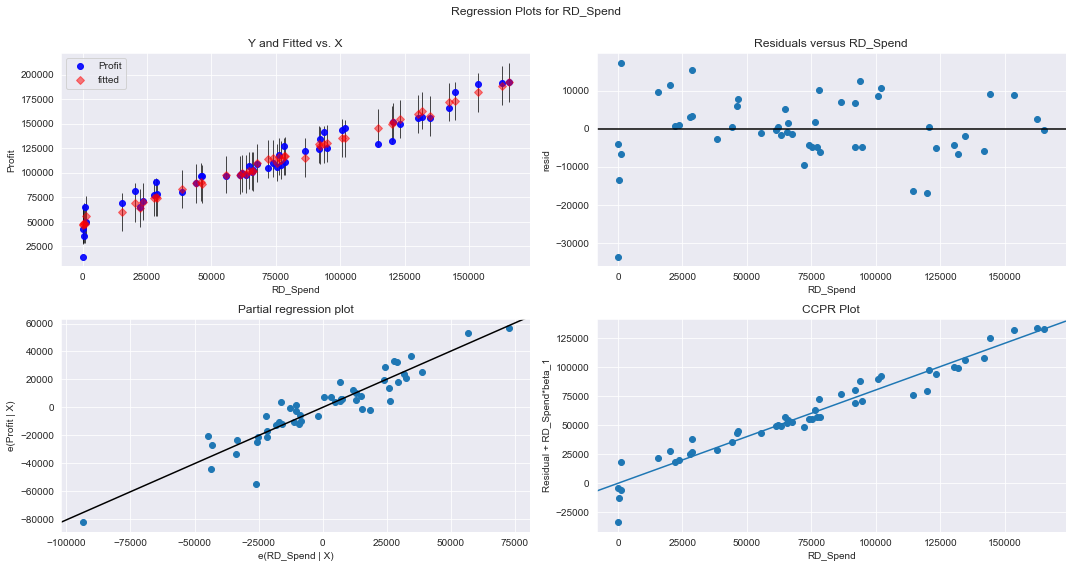

In [72]:
# Residual Vs Regressors

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

eval_env: 1


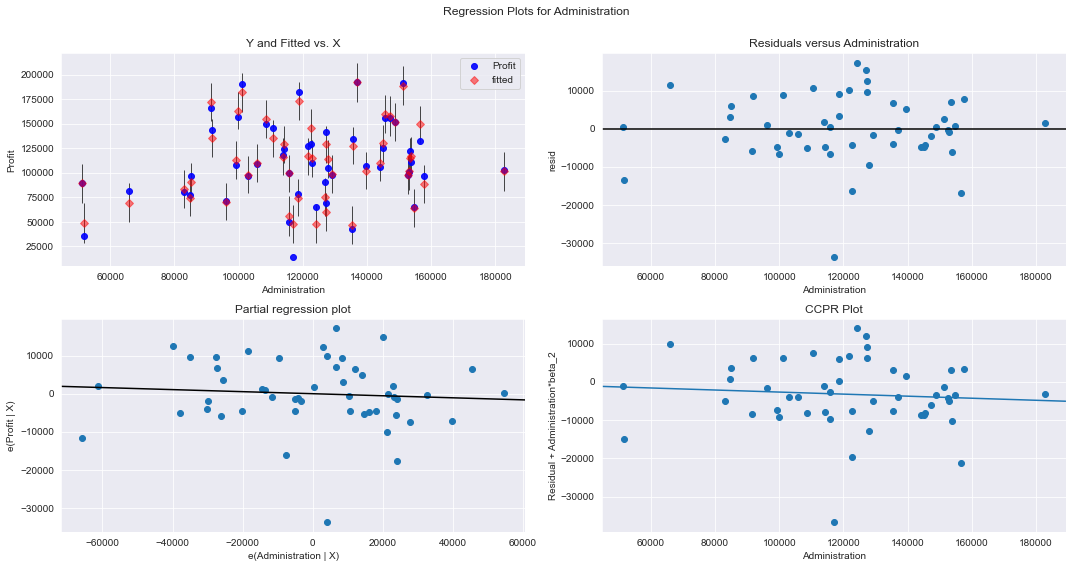

In [73]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)

eval_env: 1


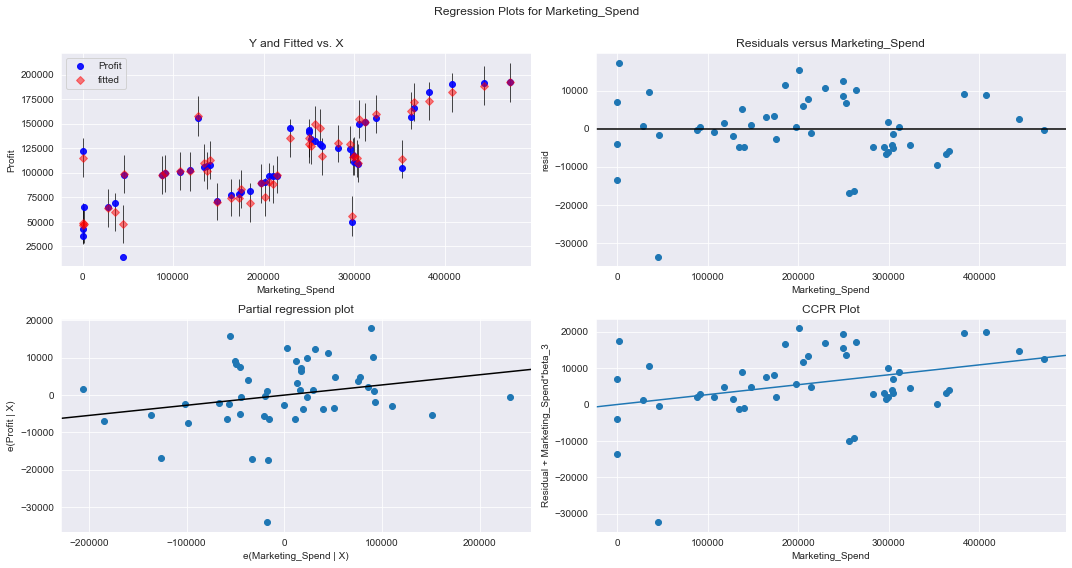

In [74]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)

# Model Deletion Diagnostics
  - Detecting Influences/Outliers

# Cook's Distance

In [75]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

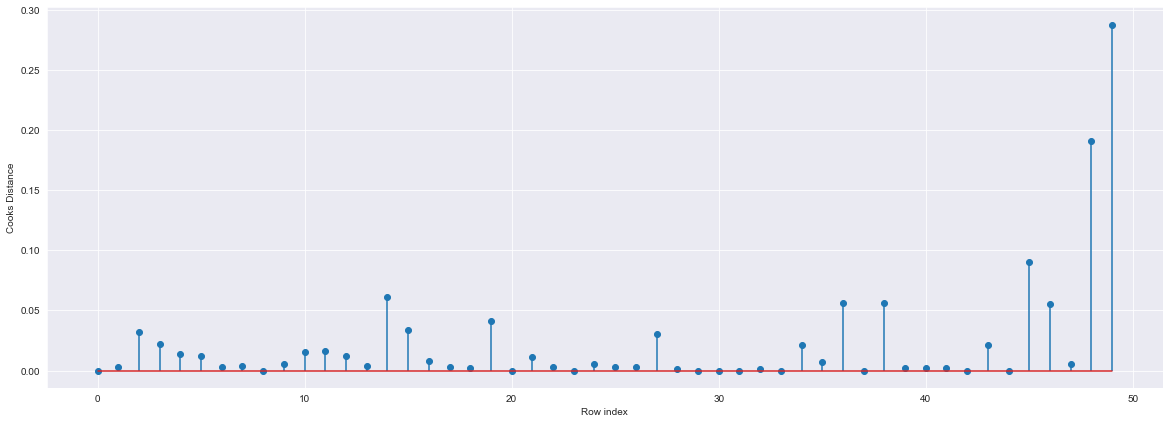

In [78]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [79]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [80]:
#All Observations are below 1,So we can say that there are no Outliers

# High Influence points

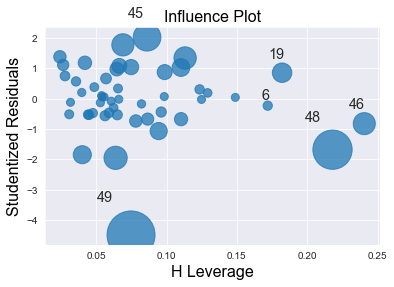

In [81]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [82]:
k = 3
n = Data.shape[0]
leverage_cuttoff = 3*((k + 1)/n)
leverage_cuttoff

0.24

In [83]:
#from the above influence plot we can see that 46th observsation is beyond the levarage value 0.24 
#so we consider that 46th observation as Outlier , so we have to remove that observation 

In [84]:
Data[Data.index.isin([46])]

,RD_Spend,Administration,Marketing_Spend,Profit
46,1315.46,115816.21,297114.46,49490.75


In [85]:
Data.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Improving the model

In [86]:
#load dataset
df = pd.read_csv('50_Startups.csv')

In [99]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df=Data.drop(Data.index[[46]],axis=0).reset_index()
df

,index,RD_Spend,Administration,Marketing_Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [98]:
#Drop the original index
#df1=df.drop(['index'],axis=1)
df1=df.drop(['index'],axis=1)
df1

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Build Model

In [101]:
#Exclude variable Marketing_spend and generate R-Squared and AIC values
model2=smf.ols("Profit~Administration+ RD_Spend", data= df1).fit()

In [102]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     395.7
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.04e-29
Time:                        15:36:01   Log-Likelihood:                -516.79
No. Observations:                  49   AIC:                             1040.
Df Residuals:                      46   BIC:                             1045.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.491e+04   6106.624      8.992      0.000    4.26e+04    6.72e+04
Administration    -0.0529      0.050     -1.060      0.295      -0.153       0.048
RD_Spend           0.8618      0.031     27.532      0.000       0.799       0.925
==============================================================================
Omnibus:                       14.173   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.999
Skew:                          -0.957   Prob(JB):                     7.49e-05
Kurtosis:                       5.376   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
(model2.rsquared,model2.aic,model2.bic)

(0.9450622519803692, 1039.5783979400685, 1045.2538588344005)

In [104]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

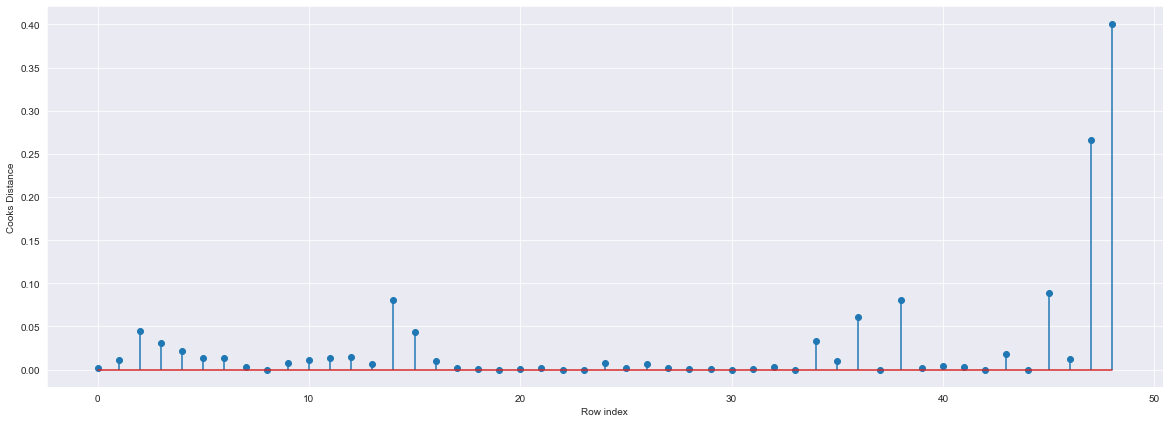

In [105]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [106]:
(np.argmax(c),np.max(c))

(48, 0.4011913720416243)

# Predicting for new data

In [111]:
new_data=pd.DataFrame({"Marketing_Spend":1200,"RD_Spend":1400,"Administration" :1600},index=[1])

In [112]:
model2.predict(new_data)

1    56032.096588
dtype: float64

In [114]:
model2.predict(df1.iloc[0:5,])

0    190163.605602
1    187025.837289
2    181793.957566
3    173050.333001
4    172542.342656
dtype: float64

In [115]:
#predicting the entire dataset
Target_Variable=model2.predict(df1)

In [116]:
Target_Variable

0     190163.605602
1     187025.837289
2     181793.957566
3     173050.333001
4     172542.342656
5     163279.748414
6     163131.585361
7     159499.193771
8     150922.879506
9     155448.884236
10    136885.934616
11    136811.688197
12    129063.510647
13    127018.019893
14    149992.010826
15    147117.425657
16    115706.164903
17    128807.300929
18    127936.941147
19    121261.563017
20    114599.222892
21    114327.280684
22    112180.188206
23    107512.705106
24    116052.294754
25    103251.859123
26    112199.776538
27    110284.975870
28    102165.925688
29    103349.118735
30    102216.400411
31     99515.067071
32    102716.559849
33     97280.285529
34     86573.280857
35     90063.725590
36     72887.307124
37     90175.620532
38     68853.409249
39     83747.801153
40     73415.848387
41     74464.550939
42     70192.495882
43     61530.286517
44     65828.624301
45     49200.202088
46     47741.406149
47     52638.367461
48     48717.696080
dtype: float64